In [268]:
import numpy as np
from scipy.signal import correlate, welch
from scipy.io import wavfile as wav
import scipy.linalg as linalg
import matplotlib.pyplot as plt
from scipy.fft import fft

In [218]:
def read_audios(og, rec):

    sample_rate1, audio_original = wav.read(og)
    sample_rate2, audio_grabado = wav.read(rec)
    audio_original = audio_original / 32767
    audio_grabado = audio_grabado / 32767
    audio_original -= np.mean(audio_original)
    audio_grabado -= np.mean(audio_grabado)
    audio_grabado = audio_grabado.mean(axis=1).astype(audio_grabado.dtype)
    
    return audio_original, audio_grabado

def calc_delay(audio_original, audio_grabado):

    # Calculate the phase correlation between the two signals
    sig1 = audio_grabado
    sig2 = np.concatenate((audio_original,np.zeros(len(audio_grabado)-len(audio_original))))

    sig1 = sig1 / np.linalg.norm(sig1)
    sig2 = sig2 / np.linalg.norm(sig2)


    cross_correlation = correlate(sig1, sig2)

    # Find the time delay (in samples) corresponding to the maximum phase correlation
    delay_samples = np.argmax(cross_correlation)-int(len(sig1)-1)

    # Calculate the time delay in seconds
    delay_seconds = delay_samples / 48000
    return delay_samples

def make_filter(M, r, p):
    wo = linalg.solve_toeplitz(r[:M],p[:M], check_finite= True)
    Jo = np.var(audio_grabado) - p[:M].dot(wo)
    return wo, Jo


In [242]:
og = ["./audios_originales/lin_og.wav",
      "./audios_originales/exp_og.wav",
      "./audios_originales/metallica_og.wav",
      "./audios_originales/poema_og.wav",
      "./audios_originales/square_og.wav", 
      "./audios_originales/white_noise_og.wav"
      ]
rec = ["./grabaciones/lin_rec.wav",
      "./grabaciones/exp_rec.wav",
      "./grabaciones/metallica_rec.wav",
      "./grabaciones/poema_rec.wav",
      "./grabaciones/square_rec.wav", 
      "./grabaciones/white_noise_rec.wav"]
labels = ['linear sweep', 'exponential sweep', 'song', 'voice', 'square', 'white noise']

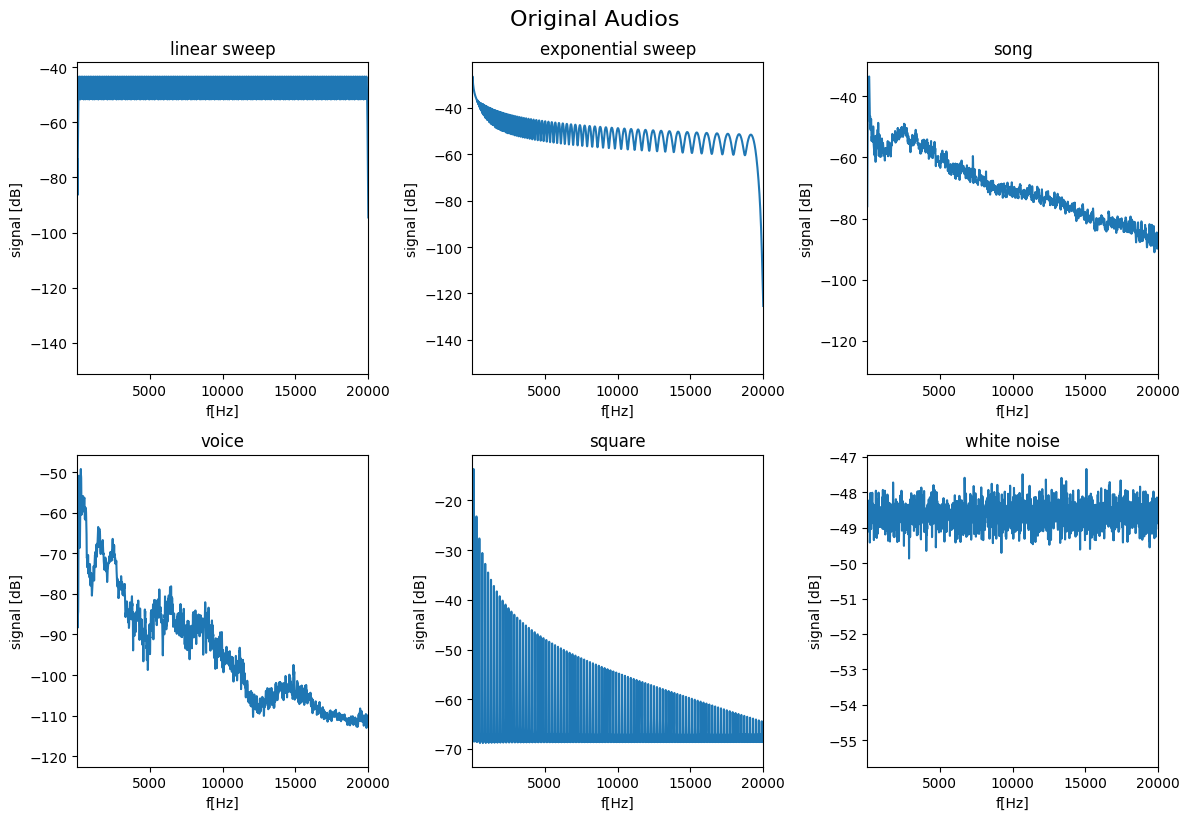

In [256]:

fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Iterate over the subplots and plot data in each one
for i in range(6):
    row = i // 3  # Calculate the row index (0 or 1)
    col = i % 3   # Calculate the column index (0, 1, or 2)
    
    audio_original, audio_grabado = read_audios(og[i], rec[i])
    f, Pxx_den = welch(audio_original, fs=48000, window='parzen', nperseg=6000, noverlap=3000, detrend='constant', return_onesided=True, scaling='density')
    plt.xlim(20,20000)
    # Plot data in the corresponding subplot
    axs[row, col].plot(f, 10*np.log10(Pxx_den))
    
    # Customize subplot labels, titles, etc., as needed
    axs[row, col].set_xlabel('f[Hz]')
    axs[row, col].set_ylabel('signal [dB]')
    axs[row, col].set_title(labels[i])
    axs[row, col].set_xlim(20,20000)

# Adjust layout and spacing
plt.tight_layout()
fig.suptitle('Audios Originales', fontsize=16,  y=1.02)


# Show the plot
plt.show()

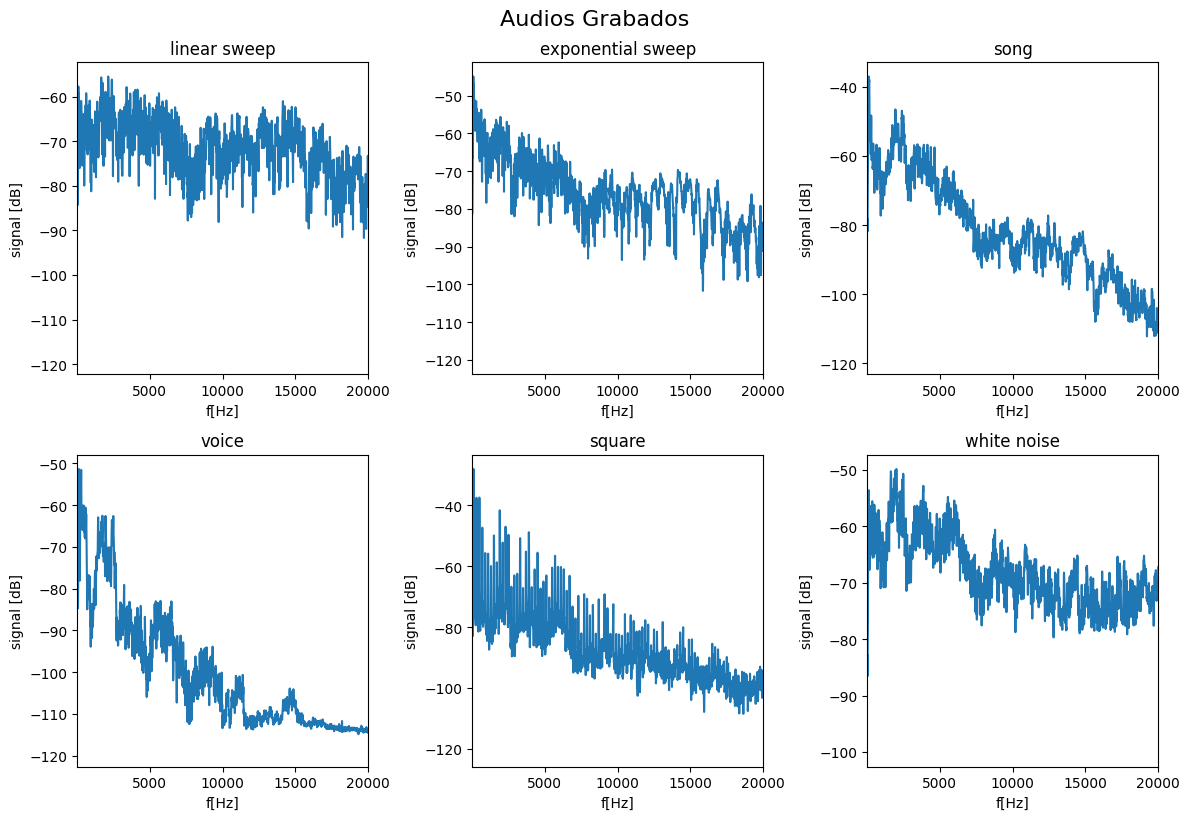

In [258]:

fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Iterate over the subplots and plot data in each one
for i in range(6):
    row = i // 3  # Calculate the row index (0 or 1)
    col = i % 3   # Calculate the column index (0, 1, or 2)
    
    audio_original, audio_grabado = read_audios(og[i], rec[i])
    f, Pxx_den = welch(audio_grabado, fs=48000, window='parzen', nperseg=6000, noverlap=3000, detrend='constant', return_onesided=True, scaling='density')
    plt.xlim(20,20000)
    # Plot data in the corresponding subplot
    axs[row, col].plot(f, 10*np.log10(Pxx_den))
    
    # Customize subplot labels, titles, etc., as needed
    axs[row, col].set_xlabel('f[Hz]')
    axs[row, col].set_ylabel('signal [dB]')
    axs[row, col].set_title(labels[i])
    axs[row, col].set_xlim(20,20000)

# Adjust layout and spacing
plt.tight_layout()
fig.suptitle('Audios Grabados', fontsize=16,  y=1.02)
# Show the plot
plt.show()

pto3

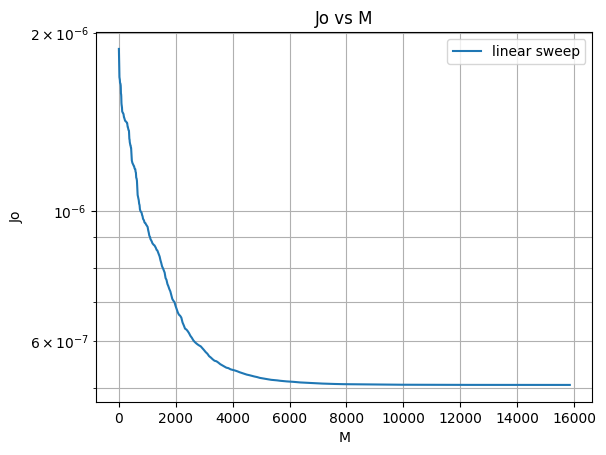

In [261]:
audio_original, audio_grabado = read_audios(og[0], rec[0])
delay_samples = calc_delay(audio_original, audio_grabado)
audio_grabado = audio_grabado[delay_samples:delay_samples+480000]


audio_grabado = audio_grabado/ np.linalg.norm(audio_grabado)
audio_original = audio_original/ np.linalg.norm(audio_original)

r = correlate(audio_original, audio_original, 'full')[len(audio_original)-1:] / len(audio_original)
p = correlate(audio_grabado, audio_original, 'full')[len(audio_original)-1:] / len(audio_original)

m_array = [int(x) for x in (np.logspace(0, 4.2, num = 500))]
Jo_array = []
Epsilon_array = []
for m in m_array:
    wo, Jo = make_filter(m, r, p)
    Jo_array.append(Jo)
    Epsilon_array.append(Jo/np.var(audio_grabado))

    plt.title('Jo vs M')
plt.xlabel('M')
plt.ylabel('Jo')
plt.grid(which='both')
plt.semilogy(m_array, Jo_array,label = labels[0])
plt.legend()


In [ ]:
#Nos quedamos con 6k
M = 6000


pto4

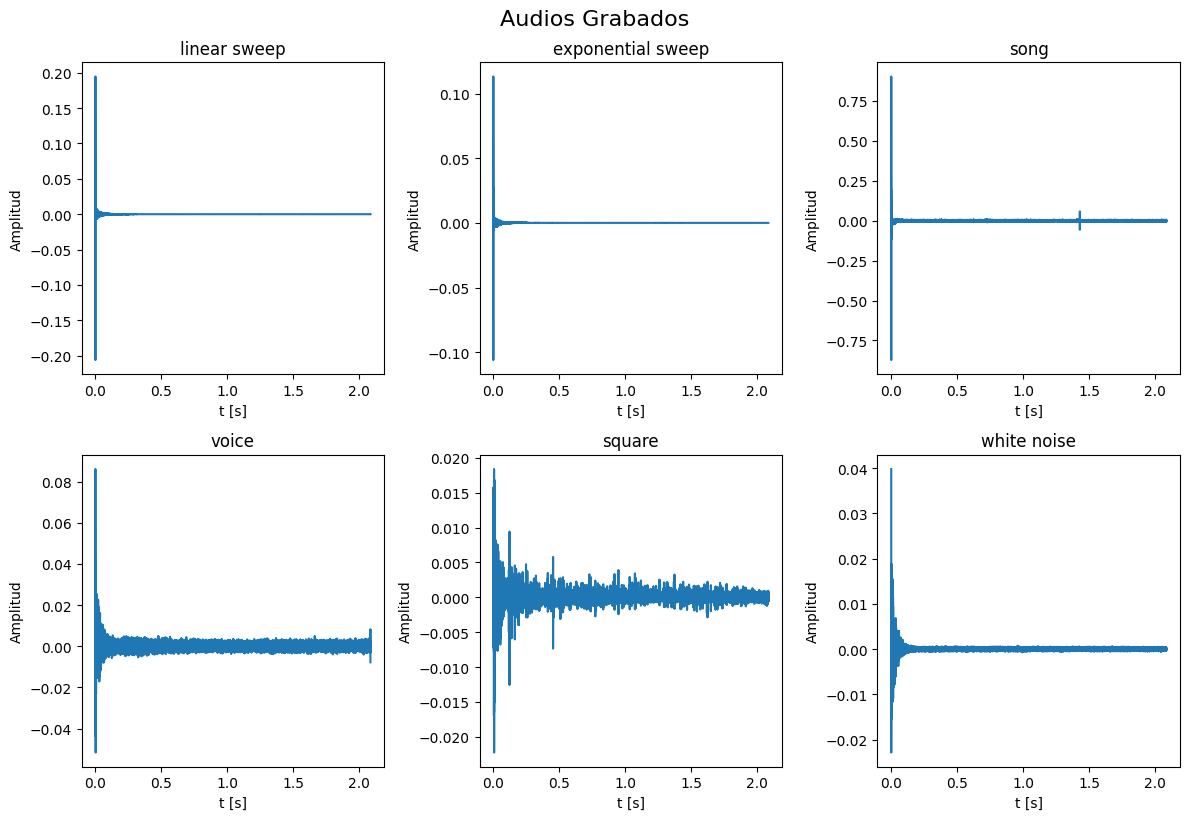

In [294]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
wo_array =[]
Jo_array = []
E_array=[]
# Iterate over the subplots and plot data in each one
for i in range(6):
    row = i // 3  # Calculate the row index (0 or 1)
    col = i % 3   # Calculate the column index (0, 1, or 2)

    audio_original, audio_grabado = read_audios(og[i], rec[i])
    delay_samples = calc_delay(audio_original, audio_grabado)
    audio_grabado = audio_grabado[delay_samples:delay_samples+480000]

    audio_grabado = audio_grabado
    audio_original = audio_original

    r = correlate(audio_original, audio_original, 'full')[len(audio_original)-1:] / len(audio_original)
    p = correlate(audio_grabado, audio_original, 'full')[len(audio_original)-1:] / len(audio_original)

    wo, Jo = make_filter(M, r, p)
    Jo_array.append(Jo)
    E_array.append(Jo/np.var(audio_grabado))
    wo_array.append(wo)
    
    # Plot data in the corresponding subplot
    axs[row, col].plot(np.array(range(len(wo)))/48000,wo)
    
    # Customize subplot labels, titles, etc., as needed
    axs[row, col].set_xlabel('t [s]')
    axs[row, col].set_ylabel('Amplitud')
    axs[row, col].set_title(labels[i])
    #axs[row, col].set_xlim(20,20000)

# Adjust layout and spacing
plt.tight_layout()
fig.suptitle('Audios Grabados', fontsize=16,  y=1.02)
# Show the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


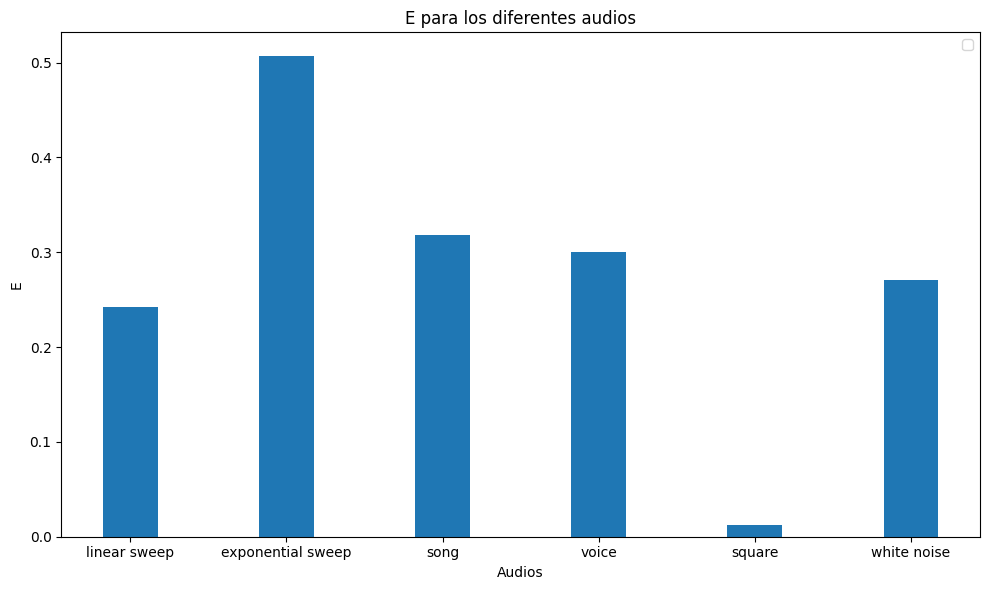

In [297]:
import matplotlib.pyplot as plt
import numpy as np



# Create an array for the x-axis positions
x = np.arange(len(labels))

# Define the width of each bar
bar_width = 0.35

# Create the grouped bar chart
plt.figure(figsize=(10, 6))
plt.bar(x, E_array, bar_width)

# Adding labels and title
plt.xlabel('Audios')
plt.ylabel('E')
plt.title('E para los diferentes audios')
plt.xticks(x, labels)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


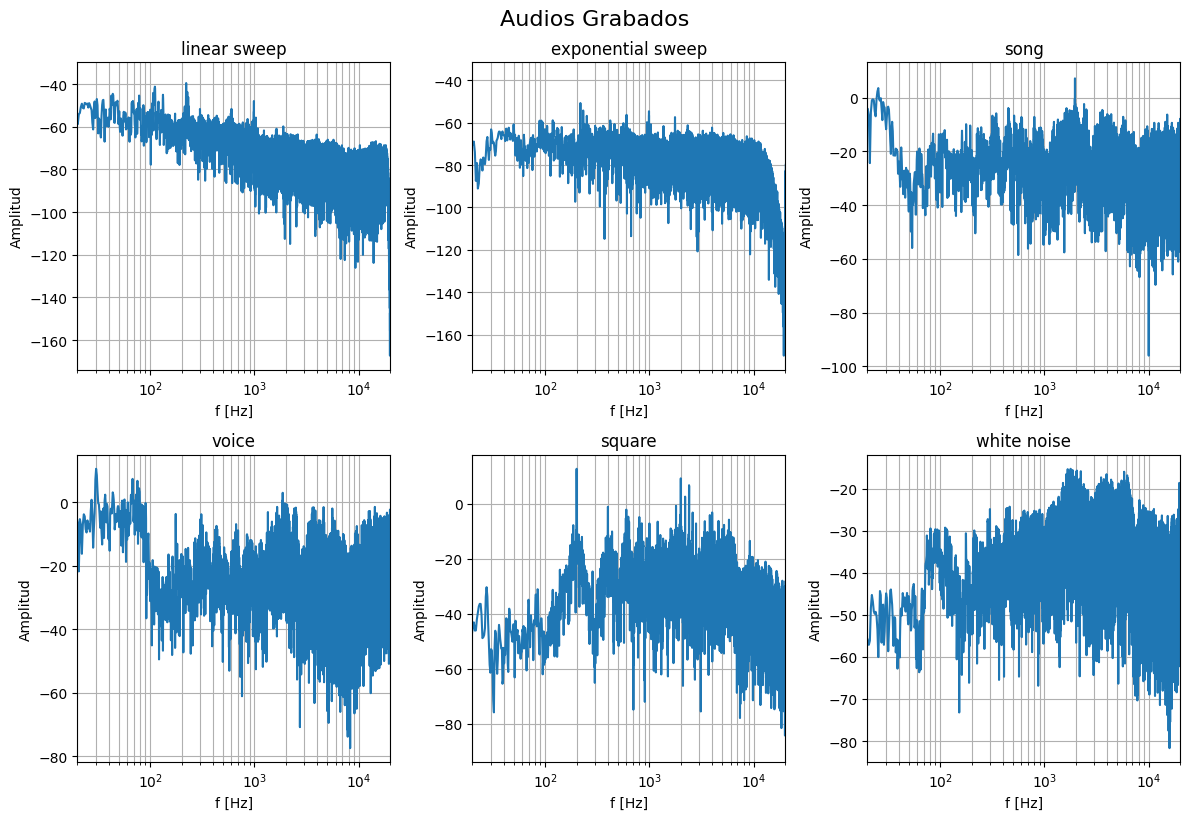

In [298]:
from scipy.signal.windows import parzen
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
# Iterate over the subplots and plot data in each one

for i in range(6):
    row = i // 3  # Calculate the row index (0 or 1)
    col = i % 3   # Calculate the column index (0, 1, or 2)


    fft_result = np.fft.fft(wo_array[i]*parzen(len(wo_array[i])))
    freqs = np.fft.fftfreq(len(fft_result), 1/48000)
    
    # Plot data in the corresponding subplot
    N = len(freqs)
    axs[row, col].semilogx(freqs[:N//2], 20*np.log10(abs(fft_result)[:N//2]))
    
    # Customize subplot labels, titles, etc., as needed
    axs[row, col].set_xlabel('f [Hz]')
    axs[row, col].set_ylabel('Amplitud')
    axs[row, col].set_title(labels[i])
    axs[row, col].set_xlim(20,20000)
    axs[row, col].grid(which='both')



# Adjust layout and spacing
plt.tight_layout()

fig.suptitle('Audios Grabados', fontsize=16,  y=1.02)
# Show the plot
plt.show()

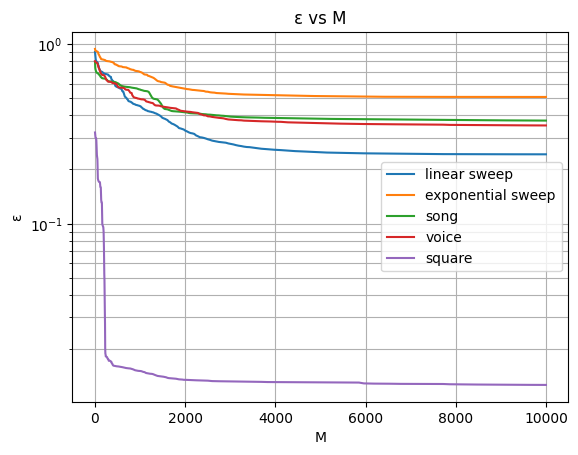

In [224]:
for n in range(len(og)):

    audio_original, audio_grabado = read_audios(og[n], rec[n])
    delay_samples = calc_delay(audio_original, audio_grabado)
    audio_grabado = audio_grabado[delay_samples:delay_samples+480000]


    audio_grabado = audio_grabado/ np.linalg.norm(audio_grabado)
    audio_original = audio_original/ np.linalg.norm(audio_original)

    r = correlate(audio_original, audio_original, 'full')[len(audio_original)-1:] / len(audio_original)
    p = correlate(audio_grabado, audio_original, 'full')[len(audio_original)-1:] / len(audio_original)

    m_array = [int(x) for x in (np.logspace(0, 4, num = 500))]
    Jo_array = []
    Epsilon_array = []
    for m in m_array:
        wo, Jo = make_filter(m, r, p)
        Jo_array.append(Jo)
        Epsilon_array.append(Jo/np.var(audio_grabado))

    plt.title('ε vs M')
    plt.xlabel('M')
    plt.ylabel('ε')
    plt.grid(which='both')
    plt.semilogy(m_array, Epsilon_array,label = labels[n])
    plt.legend()


In [299]:
audio_original, _ = read_audios('./audios_originales/metallica_og.wav','./grabaciones/metallica_rec.wav')
for i in range(5):
    convolved_result = np.convolve(audio_original, wo_array[i], mode='same')
    sample_rate = 48000
    convolved_result_scaled = np.int16(convolved_result/np.max(abs(convolved_result)) * 32767)
    output_file = "fake"+labels[i]+".wav"
    wav.write(output_file, sample_rate, convolved_result_scaled)

